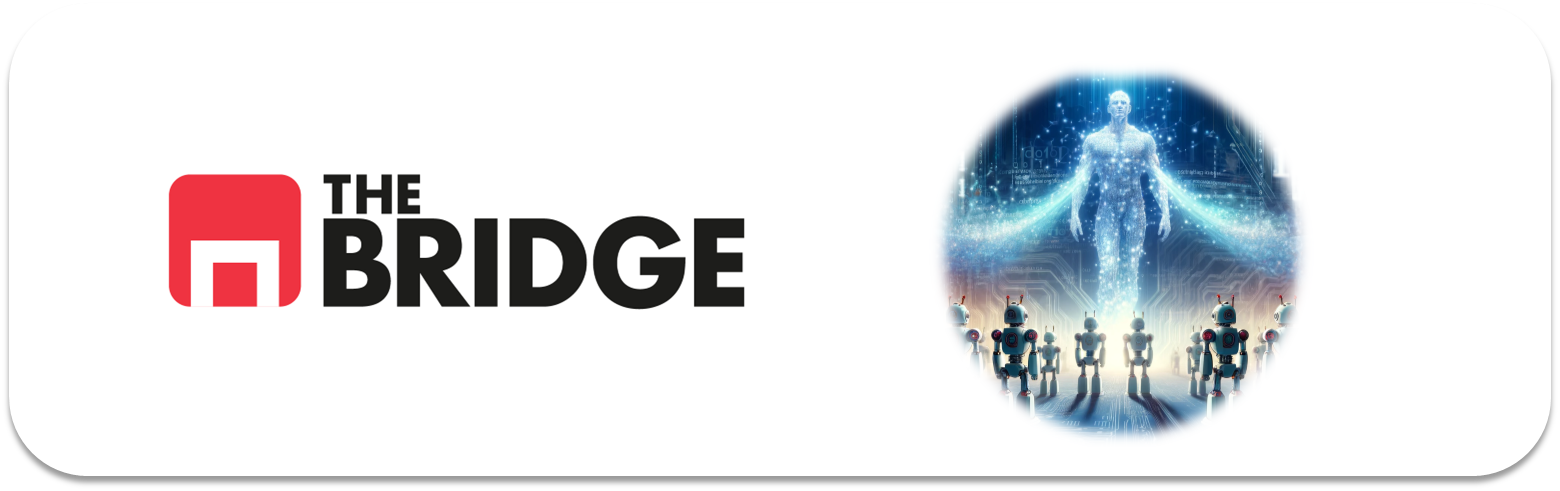

## SPARK(LING) DIAMONDS

Este ejercicio debes ejecutarlo en DataBricks y utilizando Dataframes de pyspark

1. Carga en un dataframe el dataset de clasificación de diamantes que tiene DataBricks, lo puedes encontrar en
"/databricks-datasets/Rdatasets/data-001/csv/ggplot2/diamonds.csv"

In [ ]:
df = spark.read.csv("/databricks-datasets/Rdatasets/data-001/csv/ggplot2/diamonds.csv", header = True, inferSchema = True)

2. Muestra el esquema

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- carat: double (nullable = true)
 |-- cut: string (nullable = true)
 |-- color: string (nullable = true)
 |-- clarity: string (nullable = true)
 |-- depth: double (nullable = true)
 |-- table: double (nullable = true)
 |-- price: integer (nullable = true)
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- z: double (nullable = true)



3. Muestra las 10 primeras filas de, como mínimo, dos formas diferentes

In [ ]:
df.show(10)

+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|_c0|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|
+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|  1| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|
|  2| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|
|  3| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|
|  4| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|
|  5| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|
|  6| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|  336|3.94|3.96|2.48|
|  7| 0.24|Very Good|    I|   VVS1| 62.3| 57.0|  336|3.95|3.98|2.47|
|  8| 0.26|Very Good|    H|    SI1| 61.9| 55.0|  337|4.07|4.11|2.53|
|  9| 0.22|     Fair|    E|    VS2| 65.1| 61.0|  337|3.87|3.78|2.49|
| 10| 0.23|Very Good|    H|    VS1| 59.4| 61.0|  338| 4.0|4.05|2.39|
+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 10 rows



In [ ]:
df.limit(10).toPandas().head(10)

,_c0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [ ]:
display(df.limit(10))

_c0,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.0,4.05,2.39


4. Codifica ordinalmente la columna "cut" y guarda el resultado en una nueva columna llamada "target"

In [ ]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol = "cut", outputCol = "target")

In [ ]:
model_indexer = indexer.fit(df)
print(model_indexer.labelsArray)


[('Ideal', 'Premium', 'Very Good', 'Good', 'Fair')]


In [ ]:
df_new = model_indexer.transform(df)

In [ ]:
df_new.show(10)

+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+------+
|_c0|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|target|
+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+------+
|  1| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|   0.0|
|  2| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|   1.0|
|  3| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|   3.0|
|  4| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|   1.0|
|  5| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|   3.0|
|  6| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|  336|3.94|3.96|2.48|   2.0|
|  7| 0.24|Very Good|    I|   VVS1| 62.3| 57.0|  336|3.95|3.98|2.47|   2.0|
|  8| 0.26|Very Good|    H|    SI1| 61.9| 55.0|  337|4.07|4.11|2.53|   2.0|
|  9| 0.22|     Fair|    E|    VS2| 65.1| 61.0|  337|3.87|3.78|2.49|   4.0|
| 10| 0.23|Very Good|    H|    VS1| 59.4| 61.0|  338| 4.0|4.05|2.39|   2.0|
+---+-----+-

In [ ]:
df_new.groupBy("target").count().show()

+------+-----+
|target|count|
+------+-----+
|   0.0|21551|
|   1.0|13791|
|   4.0| 1610|
|   3.0| 4906|
|   2.0|12082|
+------+-----+



5. Crea el vector de features empleando como mínimo las variables numéricas que tiene el dataframe de partida

In [ ]:
from pyspark.ml.feature import VectorAssembler

features_in = ["carat","depth","table","price","x","y","z"]
vector = VectorAssembler(inputCols= features_in, outputCol= "Vector_Features")

In [ ]:
df_new_features = vector.transform(df_new)

In [ ]:
df_new_features.show(10)

+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+------+--------------------+
|_c0|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|target|     Vector_Features|
+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+------+--------------------+
|  1| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|   0.0|[0.23,61.5,55.0,3...|
|  2| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|   1.0|[0.21,59.8,61.0,3...|
|  3| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|   3.0|[0.23,56.9,65.0,3...|
|  4| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|   1.0|[0.29,62.4,58.0,3...|
|  5| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|   3.0|[0.31,63.3,58.0,3...|
|  6| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|  336|3.94|3.96|2.48|   2.0|[0.24,62.8,57.0,3...|
|  7| 0.24|Very Good|    I|   VVS1| 62.3| 57.0|  336|3.95|3.98|2.47|   2.0|[0.24,62.3,57.0,3...|
|  8| 0.26|Very Good|    H|   

6. Divide el dataframe en un dataset de train y un dataset de test, al 70-30

In [ ]:
(train,test) = df_new_features.randomSplit((0.7,0.3))

In [ ]:
train.count()

Out[15]: 37845

In [ ]:
test.count()

Out[16]: 16095

In [ ]:
display(train)

_c0,carat,cut,color,clarity,depth,table,price,x,y,z,target,Vector_Features
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3.0,"Map(vectorType -> dense, length -> 7, values -> List(0.23, 56.9, 65.0, 327.0, 4.05, 4.07, 2.31))"
4,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63,1.0,"Map(vectorType -> dense, length -> 7, values -> List(0.29, 62.4, 58.0, 334.0, 4.2, 4.23, 2.63))"
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2.0,"Map(vectorType -> dense, length -> 7, values -> List(0.24, 62.8, 57.0, 336.0, 3.94, 3.96, 2.48))"
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2.0,"Map(vectorType -> dense, length -> 7, values -> List(0.24, 62.3, 57.0, 336.0, 3.95, 3.98, 2.47))"
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,2.0,"Map(vectorType -> dense, length -> 7, values -> List(0.26, 61.9, 55.0, 337.0, 4.07, 4.11, 2.53))"
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.0,4.05,2.39,2.0,"Map(vectorType -> dense, length -> 7, values -> List(0.23, 59.4, 61.0, 338.0, 4.0, 4.05, 2.39))"
12,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.9,2.46,0.0,"Map(vectorType -> dense, length -> 7, values -> List(0.23, 62.8, 56.0, 340.0, 3.93, 3.9, 2.46))"
14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71,0.0,"Map(vectorType -> dense, length -> 7, values -> List(0.31, 62.2, 54.0, 344.0, 4.35, 4.37, 2.71))"
16,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68,1.0,"Map(vectorType -> dense, length -> 7, values -> List(0.32, 60.9, 58.0, 345.0, 4.38, 4.42, 2.68))"
17,0.3,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68,0.0,"Map(vectorType -> dense, length -> 7, values -> List(0.3, 62.0, 54.0, 348.0, 4.31, 4.34, 2.68))"


In [ ]:
display(test)

_c0,carat,cut,color,clarity,depth,table,price,x,y,z,target,Vector_Features
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0,"Map(vectorType -> dense, length -> 7, values -> List(0.23, 61.5, 55.0, 326.0, 3.95, 3.98, 2.43))"
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0,"Map(vectorType -> dense, length -> 7, values -> List(0.21, 59.8, 61.0, 326.0, 3.89, 3.84, 2.31))"
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3.0,"Map(vectorType -> dense, length -> 7, values -> List(0.31, 63.3, 58.0, 335.0, 4.34, 4.35, 2.75))"
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,4.0,"Map(vectorType -> dense, length -> 7, values -> List(0.22, 65.1, 61.0, 337.0, 3.87, 3.78, 2.49))"
11,0.3,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73,3.0,"Map(vectorType -> dense, length -> 7, values -> List(0.3, 64.0, 55.0, 339.0, 4.25, 4.28, 2.73))"
13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,1.0,"Map(vectorType -> dense, length -> 7, values -> List(0.22, 60.4, 61.0, 342.0, 3.88, 3.84, 2.33))"
15,0.2,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27,1.0,"Map(vectorType -> dense, length -> 7, values -> List(0.2, 60.2, 62.0, 345.0, 3.79, 3.75, 2.27))"
19,0.3,Good,J,SI1,63.8,56.0,351,4.23,4.26,2.71,3.0,"Map(vectorType -> dense, length -> 7, values -> List(0.3, 63.8, 56.0, 351.0, 4.23, 4.26, 2.71))"
27,0.24,Premium,I,VS1,62.5,57.0,355,3.97,3.94,2.47,1.0,"Map(vectorType -> dense, length -> 7, values -> List(0.24, 62.5, 57.0, 355.0, 3.97, 3.94, 2.47))"
29,0.23,Very Good,D,VS2,60.5,61.0,357,3.96,3.97,2.4,2.0,"Map(vectorType -> dense, length -> 7, values -> List(0.23, 60.5, 61.0, 357.0, 3.96, 3.97, 2.4))"


7. Entrena un Clasificador RandomForest con al menos tres valores diferentes de estimadores

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

num_tress = [10,50,1000]

models = {}

for indice,tress in enumerate(num_tress):
    model = RandomForestClassifier(featuresCol="Vector_Features", labelCol= "target", numTrees = tress)
    models["modelo_{}".format(indice)] = model.fit(train)

8. Evalua por separado cada modelo, muestra la precision y recall por categoría (con su etiqueta original), así como el accuracy medio

In [ ]:
evaluations = {}
for indice in range(3):
    evaluations["modelo_{}".format(indice)] = models["modelo_{}".format(indice)].evaluate(test)

In [ ]:
for indice in range(3):
    print("Evaluacion Modelo con {} estimadores".format(num_tress[indice]))
    print("Class\tPrecision\tRecall")
    print("-"*30)
    for clase,precision,recall in zip(model_indexer.labels, evaluations["modelo_{}".format(indice)].precisionByLabel, evaluations["modelo_{}".format(indice)].recallByLabel):
        print("%s\t%.3f\t%.3f" %(clase,precision,recall))
    print()
    print("Accuracy medio: %.3f" %(evaluations["modelo_{}".format(indice)].accuracy))
    print("*"*30)

Evaluacion Modelo con 10 estimadores
Class	Precision	Recall
------------------------------
Ideal	0.785	0.941
Premium	0.628	0.861
Very Good	0.634	0.219
Good	0.684	0.451
Fair	0.709	0.706

Accuracy medio: 0.709
******************************
Evaluacion Modelo con 50 estimadores
Class	Precision	Recall
------------------------------
Ideal	0.788	0.938
Premium	0.622	0.865
Very Good	0.626	0.237
Good	0.726	0.406
Fair	0.712	0.715

Accuracy medio: 0.709
******************************
Evaluacion Modelo con 1000 estimadores
Class	Precision	Recall
------------------------------
Ideal	0.785	0.940
Premium	0.622	0.865
Very Good	0.633	0.225
Good	0.711	0.418
Fair	0.709	0.704

Accuracy medio: 0.708
******************************


¿Cuál es el mejor?¿

No parece que haya grandes diferencias, deberíamos ver si alguno de ellos está overfitteando, de todas formas

In [ ]:
for i in range(3):
    print("Modelo con %d estimadores" %(num_tress[i]))
    evaluation = models["modelo_{}".format(i)].evaluate(train)
    print("Accuracy: %.3f" %(evaluation.accuracy))

Modelo con 10 estimadores
Accuracy: 0.710
Modelo con 50 estimadores
Accuracy: 0.710
Modelo con 1000 estimadores
Accuracy: 0.710


Partiríamos del segundo (50 árboles) e intentaríamos mejorar los resultados a partir de ahí

__Para Nota__: Haz un onehotencoding o un ordinalencoding de las variables categoricas y entrena un GBT con 20 estimadores

Importamos todo lo necesario

In [ ]:
from pyspark.sql.functions import col,udf
from pyspark.sql.types import StringType
from pyspark.ml.classification import GBTClassifier, OneVsRest
from pyspark.ml.feature import OneHotEncoder

Vamos a hacer el ordinal encoding de la feature Clarity pero para ello necesitamos ordenarlo de forma que el StringIndexer lo ajuste a la escala:
https://www.americangemsociety.org/buying-diamonds-with-confidence/4cs-of-diamonds/understanding-diamond-clarity-the-4cs-of-diamonds/diamond-clarity-scale/#:~:text=A%20diamond%20with%20a%20clarity,to%20see%20under%2010x%20magnification.&text=Very%20Slightly%20Included%20diamonds%20with,or%20VS2)%20have%20minor%20inclusions.

In [ ]:
df_new.groupBy("Clarity").count().show()

+-------+-----+
|Clarity|count|
+-------+-----+
|   VVS2| 5066|
|    SI1|13065|
|     IF| 1790|
|     I1|  741|
|   VVS1| 3655|
|    VS2|12258|
|    SI2| 9194|
|    VS1| 8171|
+-------+-----+



In [ ]:
def prepare_clarity(row):
    return "Z_IF" if row == "IF" else row.replace("2","a").replace("1","b")

In [ ]:
udf_prepare = udf(lambda row: prepare_clarity(row), StringType())

In [ ]:
df_new_prepared = df_new.withColumn("Ord_Clarity", udf_prepare(col("Clarity")))

In [ ]:
df_new_prepared.groupBy("clarity").count().show()

+-------+-----+
|clarity|count|
+-------+-----+
|   VVS2| 5066|
|    SI1|13065|
|     IF| 1790|
|     I1|  741|
|   VVS1| 3655|
|    VS2|12258|
|    SI2| 9194|
|    VS1| 8171|
+-------+-----+



In [ ]:
df_new_prepared.groupBy("Ord_Clarity").count().show()

+-----------+-----+
|Ord_Clarity|count|
+-----------+-----+
|       Z_IF| 1790|
|        VSb| 8171|
|       VVSa| 5066|
|         Ib|  741|
|       VVSb| 3655|
|        VSa|12258|
|        SIb|13065|
|        SIa| 9194|
+-----------+-----+



Aprovechamos para hacer el ordinal encoder de Color que necesitamos como paso previo a su onehotencoding

In [ ]:
indexer_clarity = StringIndexer(inputCols = ["Ord_Clarity","color"], outputCols= ["feat_clarity","Ord_Color"], stringOrderType= "alphabetAsc")
indexer_model_clarity = indexer_clarity.fit(df_new_prepared)

In [ ]:
indexer_model_clarity.labelsArray

Out[31]: [('Ib', 'SIa', 'SIb', 'VSa', 'VSb', 'VVSa', 'VVSb', 'Z_IF'),
 ('D', 'E', 'F', 'G', 'H', 'I', 'J')]

In [ ]:
df_new_feat_clarity = indexer_model_clarity.transform(df_new_prepared)

In [ ]:
df_new_feat_clarity.show(10)

+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+------+-----------+------------+---------+
|_c0|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|target|Ord_Clarity|feat_clarity|Ord_Color|
+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+------+-----------+------------+---------+
|  1| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|   0.0|        SIa|         1.0|      1.0|
|  2| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|   1.0|        SIb|         2.0|      1.0|
|  3| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|   3.0|        VSb|         4.0|      1.0|
|  4| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|   1.0|        VSa|         3.0|      5.0|
|  5| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|   3.0|        SIa|         1.0|      6.0|
|  6| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|  336|3.94|3.96|2.48|   2.0|       VVSa|         5.0|      6.0|
|

Ahora a hacer el one_hot_encoding del color

In [ ]:
oHEncoder = OneHotEncoder(inputCol= "Ord_Color", outputCol= "Color_Encoded")
oHModel = oHEncoder.fit(df_new_feat_clarity)

In [ ]:
df_pre_train = oHModel.transform(df_new_feat_clarity)

In [ ]:
df_pre_train.show()

+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+------+-----------+------------+---------+-------------+
|_c0|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|target|Ord_Clarity|feat_clarity|Ord_Color|Color_Encoded|
+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+------+-----------+------------+---------+-------------+
|  1| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|   0.0|        SIa|         1.0|      1.0|(6,[1],[1.0])|
|  2| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|   1.0|        SIb|         2.0|      1.0|(6,[1],[1.0])|
|  3| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|   3.0|        VSb|         4.0|      1.0|(6,[1],[1.0])|
|  4| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|   1.0|        VSa|         3.0|      5.0|(6,[5],[1.0])|
|  5| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|   3.0|        SIa|         1.0|      6.0|    (6,[],[])|


In [ ]:
from pyspark.ml.functions import vector_to_array
df_train = df_pre_train.withColumn("one_hot", vector_to_array(col("Color_Encoded")))

In [ ]:
df_train.show()

+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+------+-----------+------------+---------+-------------+--------------------+
|_c0|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|target|Ord_Clarity|feat_clarity|Ord_Color|Color_Encoded|             one_hot|
+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+------+-----------+------------+---------+-------------+--------------------+
|  1| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|   0.0|        SIa|         1.0|      1.0|(6,[1],[1.0])|[0.0, 1.0, 0.0, 0...|
|  2| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|   1.0|        SIb|         2.0|      1.0|(6,[1],[1.0])|[0.0, 1.0, 0.0, 0...|
|  3| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|   3.0|        VSb|         4.0|      1.0|(6,[1],[1.0])|[0.0, 1.0, 0.0, 0...|
|  4| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|   1.0|        VSa|         3.0|      5.0|(6,[5],[1.0])|

In [ ]:
features_in = ["table","depth","feat_clarity","price","Color_Encoded"]
vector = VectorAssembler(inputCols= features_in, outputCol= "Vector_Features")

In [ ]:
data_full = vector.transform(df_train)

In [ ]:
train,test = data_full.randomSplit((0.7,0.3))

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

num_tress = [10]

models = {}

for indice,tress in enumerate(num_tress):
    model = RandomForestClassifier(featuresCol="Vector_Features", labelCol= "target", numTrees = tress)
    models["modelo_{}".format(indice)] = model.fit(train)

In [ ]:
evaluations = {}
for indice in range(len(models)):
    evaluations["modelo_{}".format(indice)] = models["modelo_{}".format(indice)].evaluate(test)

In [ ]:
for indice in range(len(models)):
    print("Evaluacion Modelo con {} estimadores".format(num_tress[indice]))
    print("Class\tPrecision\tRecall")
    print("-"*30)
    for clase,precision,recall in zip(model_indexer.labels, evaluations["modelo_{}".format(indice)].precisionByLabel, evaluations["modelo_{}".format(indice)].recallByLabel):
        print("%s\t%.3f\t%.3f" %(clase,precision,recall))
    print()
    print("Accuracy medio: %.3f" %(evaluations["modelo_{}".format(indice)].accuracy))
    print("*"*30)

Evaluacion Modelo con 10 estimadores
Class	Precision	Recall
------------------------------
Ideal	0.790	0.944
Premium	0.608	0.873
Very Good	0.568	0.165
Good	0.590	0.438
Fair	0.722	0.545

Accuracy medio: 0.694
******************************


In [ ]:
gbt_clf = GBTClassifier(maxIter= 20)

In [ ]:
multi_clf = OneVsRest(classifier = gbt_clf, featuresCol="Vector_Features", labelCol="target")

In [ ]:
model = multi_clf.fit(train)

In [ ]:
predictions = model.transform(test)

In [ ]:
predictions.show()

+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+------+-----------+------------+---------+-------------+--------------------+--------------------+--------------------+----------+
|_c0|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|target|Ord_Clarity|feat_clarity|Ord_Color|Color_Encoded|             one_hot|     Vector_Features|       rawPrediction|prediction|
+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+------+-----------+------------+---------+-------------+--------------------+--------------------+--------------------+----------+
|  8| 0.26|Very Good|    H|    SI1| 61.9| 55.0|  337|4.07|4.11|2.53|   2.0|        SIb|         2.0|      4.0|(6,[4],[1.0])|[0.0, 0.0, 0.0, 0...|(10,[0,1,2,3,8],[...|[1.01734600481387...|       0.0|
| 10| 0.23|Very Good|    H|    VS1| 59.4| 61.0|  338| 4.0|4.05|2.39|   2.0|        VSb|         4.0|      4.0|(6,[4],[1.0])|[0.0, 0.0, 0.0, 0...|(10,[0,1,2,3,8],[...|[-1.4302430505844...|       2.0|
| 12|

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
clases = {valor["cut"]: valor["target"] for valor in predictions.select("target","cut").distinct().collect() }

In [ ]:
print(clases)

{'Fair': 4.0, 'Very Good': 2.0, 'Good': 3.0, 'Ideal': 0.0, 'Premium': 1.0}


In [ ]:
eval = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol="target", metricName="accuracy")
precision_by_label = {}
recall_by_label = {}
for name,label in clases.items():
    eval.setMetricLabel(label)
    for dicc,metric in zip([precision_by_label, recall_by_label],["precisionByLabel", "recallByLabel"]):
        eval.setMetricName(metric)
        dicc[name] = eval.evaluate(predictions)
eval.setMetricName("accuracy")
acc = eval.evaluate(predictions)


Clase	Precision	Recall
-------------------------
Fair	0.68	0.80
Very Good	0.62	0.29
Good	0.64	0.53
Ideal	0.81	0.93
Premium	0.64	0.83
Avg. Accuracy: 0.72


In [ ]:
print("Clase\tPrecision\tRecall")
print("-"*25)
for name in clases:
    print("%s\t%.2f\t%.2f" %(name,precision_by_label[name],recall_by_label[name]))
print("Total Accuracy: %.2f" %(mean_acc))

Clase	Precision	Recall
-------------------------
Fair	0.68	0.80
Very Good	0.62	0.29
Good	0.64	0.53
Ideal	0.81	0.93
Premium	0.64	0.83
Total Accuracy: 0.72
